In [32]:
import pandas as pd
import nltk
from nltk import FreqDist
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from wordcloud import STOPWORDS

In [33]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_reviews.csv')

In [34]:
# Tokenize the content
tokenized_content = [nltk.word_tokenize(text) for text in df['content']]

In [35]:
# Flatten the list of tokenized content
all_tokens = [token for sublist in tokenized_content for token in sublist]

In [36]:
# Separate positive and negative reviews based on score
positive_reviews = df[df['score'] > 3]['content']
negative_reviews = df[df['score'] <= 3]['content']

In [37]:
# Tokenize positive and negative reviews
positive_tokens = [nltk.word_tokenize(text) for text in positive_reviews]
negative_tokens = [nltk.word_tokenize(text) for text in negative_reviews]

In [38]:
# Flatten the lists of tokenized content
all_positive_tokens = [token for sublist in positive_tokens for token in sublist]
all_negative_tokens = [token for sublist in negative_tokens for token in sublist]

In [39]:
# Generate bigrams and trigrams for positive and negative reviews
positive_bigrams = list(ngrams(all_positive_tokens, 2))
positive_trigrams = list(ngrams(all_positive_tokens, 3))
negative_bigrams = list(ngrams(all_negative_tokens, 2))
negative_trigrams = list(ngrams(all_negative_tokens, 3))

In [40]:
# Get the frequency distribution of bigrams and trigrams
positive_bigram_freq = FreqDist(positive_bigrams)
positive_trigram_freq = FreqDist(positive_trigrams)
negative_bigram_freq = FreqDist(negative_bigrams)
negative_trigram_freq = FreqDist(negative_trigrams)

In [41]:
# Get the most common bigrams and trigrams
most_common_positive_bigrams = positive_bigram_freq.most_common(10)
most_common_positive_trigrams = positive_trigram_freq.most_common(10)
most_common_negative_bigrams = negative_bigram_freq.most_common(10)
most_common_negative_trigrams = negative_trigram_freq.most_common(10)

In [42]:
# Convert to DataFrame for visualization
positive_bigram_df = pd.DataFrame(most_common_positive_bigrams, columns=['Bigram', 'Frequency'])
positive_trigram_df = pd.DataFrame(most_common_positive_trigrams, columns=['Trigram', 'Frequency'])
negative_bigram_df = pd.DataFrame(most_common_negative_bigrams, columns=['Bigram', 'Frequency'])
negative_trigram_df = pd.DataFrame(most_common_negative_trigrams, columns=['Trigram', 'Frequency'])

<Figure size 2000x1000 with 0 Axes>

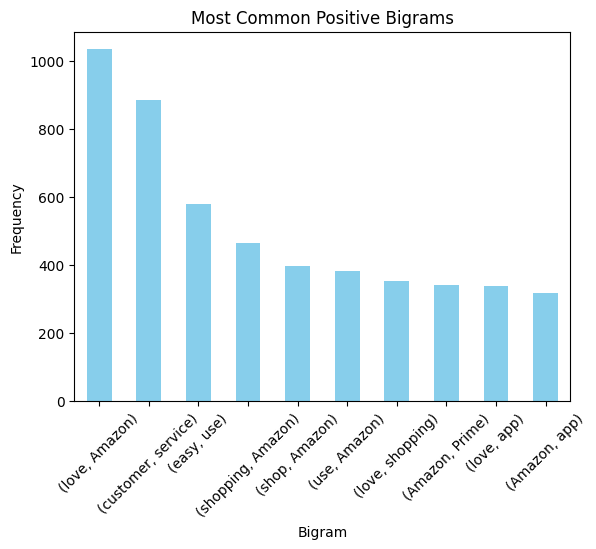

In [43]:
# Plot the most common positive bigrams
plt.figure(figsize=(20, 10))
positive_bigram_df.plot(kind='bar', x='Bigram', y='Frequency', legend=False, color='skyblue')
plt.title('Most Common Positive Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

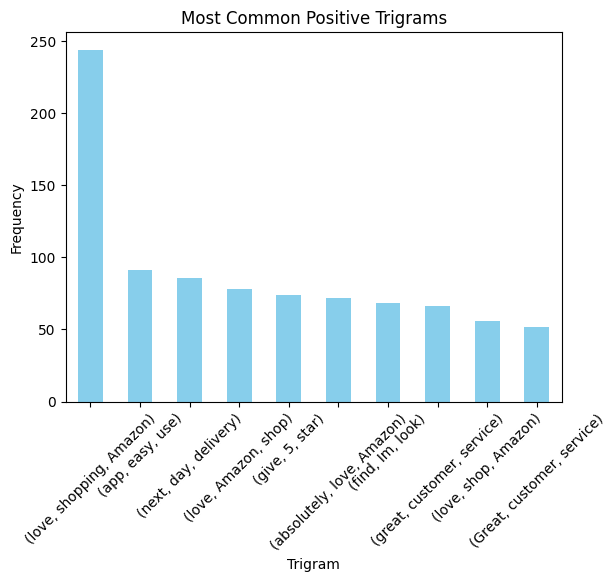

In [44]:
# Plot the most common positive trigrams
plt.figure(figsize=(10, 6))
positive_trigram_df.plot(kind='bar', x='Trigram', y='Frequency', legend=False, color='skyblue')
plt.title('Most Common Positive Trigrams')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

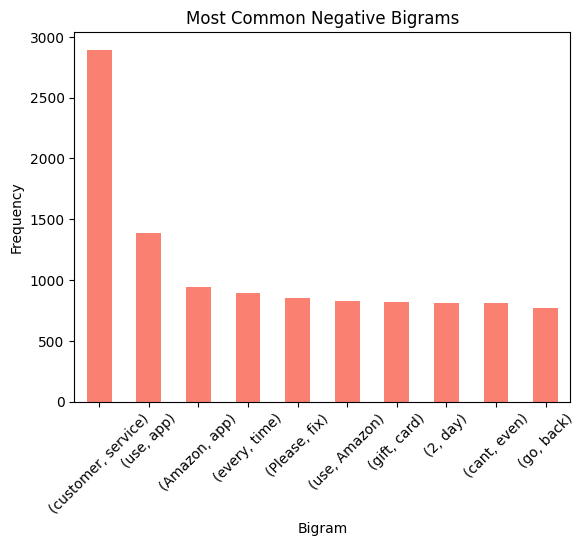

In [45]:
# Plot the most common negative bigrams
plt.figure(figsize=(10, 6))
negative_bigram_df.plot(kind='bar', x='Bigram', y='Frequency', legend=False, color='salmon')
plt.title('Most Common Negative Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

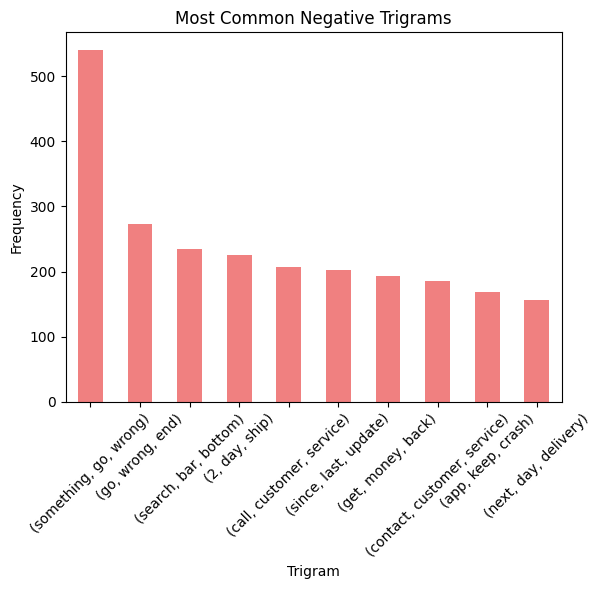

In [46]:
# Plot the most common negative trigrams
plt.figure(figsize=(10, 6))
negative_trigram_df.plot(kind='bar', x='Trigram', y='Frequency', legend=False, color='lightcoral')
plt.title('Most Common Negative Trigrams')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [47]:
# Define a list of words to exclude
words_to_exclude = ['Amazon', 'app', 'use', 'get', 'one', 'like', 'Im', 'cant', 'lot', 'make', 'say', 'Ive', 'dont', 'need', 'stuff', 'thing', 'never', 'want', 'go', 'even']

In [48]:
# Add the list of words to the stopwords
stopwords = set(STOPWORDS)
stopwords.update(words_to_exclude)

In [49]:
# Generate word cloud for the most frequent words, excluding the specified words
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(' '.join(all_tokens))

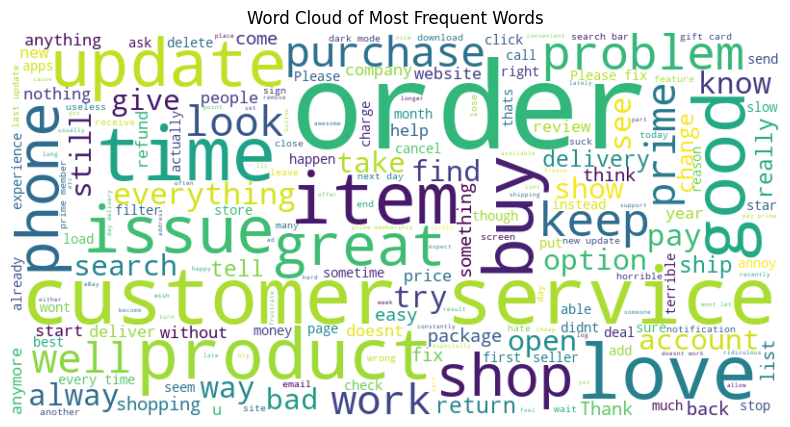

In [50]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

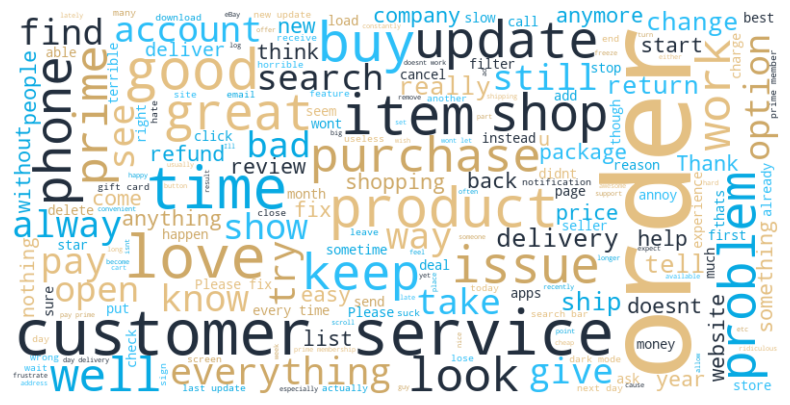

In [61]:
# Define a color function for the word cloud
def amazon_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#2DBFF8","#08AAE3","#E4C083", "#CEA968","#232F3E"]  # Amazon's color scheme
    return colors[random_state.randint(0, len(colors) - 1)]

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',  stopwords=stopwords, color_func=amazon_color_func).generate(' '.join(df['content']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud of Most Frequent Words', fontsize=20,weight='bold')
plt.show()

In [52]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [53]:
reviews = pd.read_csv('sentiment_reviews.csv')

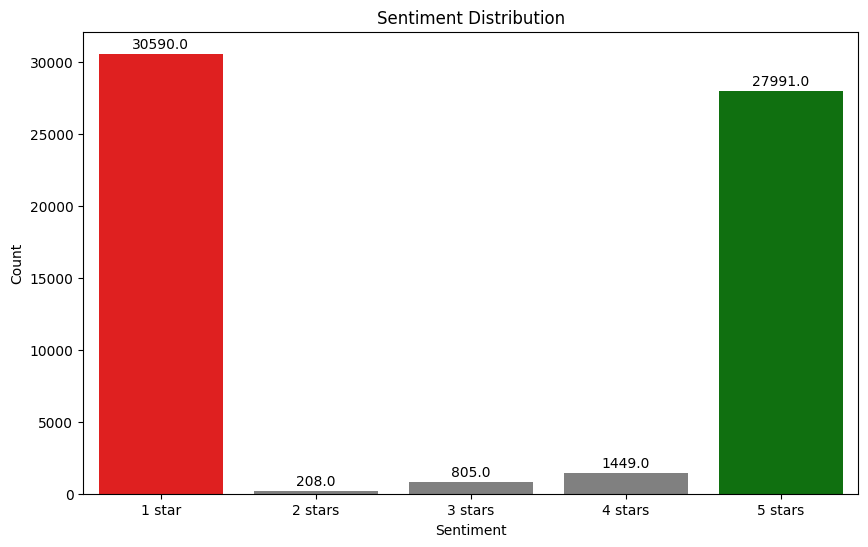

In [54]:
# Define the color palette
palette = {'1 star': 'red', '2 stars': 'gray', '3 stars': 'gray', '4 stars': 'gray', '5 stars': 'green'}

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sentiment', data=reviews, order=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], palette=palette)

# Add value counts as labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 2), textcoords='offset points')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

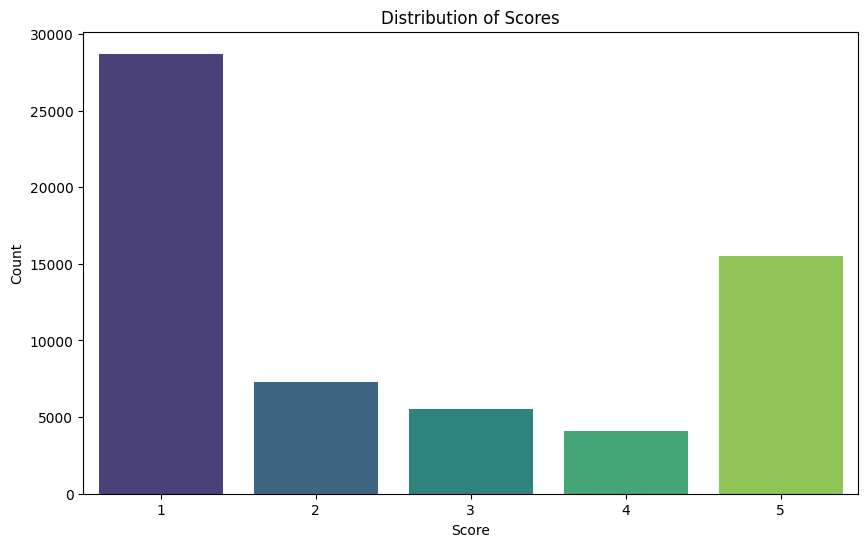

In [55]:
# Create a bar plot for score column
plt.figure(figsize=(10, 6))
sns.countplot(x='score', data=df, palette='viridis')

# Add value counts as labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 2), textcoords='offset points')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()